In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math 

In [4]:
# Takes lines in the form of ax + by = c
class Line:
    def __init__(self, a, b, c):
        self.formula = {'a': a, 'b':b, 'c':c}
        self.s_formula = self.parse_to_s(a, b, c)
        
        
    def parse_to_s(self, a, b, c):
        if b == 0:
            vertical = True
            m = None
            n = c/a
        else:
            vertical = False
            m = -a/b
            n = c/b
        return {'m':m, 'n':n, 'vertical':vertical}
    
#     def plug(self, x):
#         if self.s_formula['vertical'] == False:
            
        
    def plot(self, ax=False, axis=[-10, 10, -10, 10], *args, **kwargs):
        if self.s_formula['vertical'] == False:
            x = np.linspace(axis[0], axis[1], 10)
            m, b = self.s_formula['m'], self.s_formula['n']
            y = [m*i + b for i in x]
        
        else:
            x = [self.s_formula['n']] * 10
            y = np.linspace(axis[2], axis[3], 10)
            
        if not ax:
            ax = default_axes(*args, **kwargs)
            
        ax.plot(x, y, *args, **kwargs)
        return ax
    
    
    def has(self, point):
        a, b, c = self.formula['a'], self.formula['b'], self.formula['c']
        x = point[0]
        y = point[1]
        return a*x + b*y == c
    
    
    def distance(self, point):
        a, b, c = self.formula['a'], self.formula['b'], self.formula['c']
        x, y = point
        numerator = abs(a*x + b*y - c)
        denominator = norm([a, b])
        return numerator/denominator
    
    
    def get_perpendicular(self, point):
        a, b, c = self.formula['a'], self.formula['b'], self.formula['c']
        a1 = -1 * b
        b1 = a
        c1 = point[0] * a1 + point[1] * b1
        return Line(a1, b1, c1)
    
    
    def get_perp_intersection(self, point):
        a, b, c = self.formula['a'], self.formula['b'], self.formula['c']
        d = self.get_perpendicular(point).formula['c']
        y = round((a*d + b*c)/(a**2 + b**2), 6)
        x = round((c - b*y)/a, 6)
        return [x, y]
    

class Circle:
    def __init__(self, c, r):
        self.formula = {'c':c, 'r':r}
        
    def plot(self, ax=False, axis=[-10, 10, -10, 10], figsize=(10,10), *args, **kwargs):
        c, r = self.formula['c'], self.formula['r']
        C = plt.Circle(c, r, fill=False, *args, **kwargs)
        if not ax:
            ax = default_axes(*args, **kwargs)
        ax.add_artist(C)
        return ax
    
    
    def has(self, point):
        c, r = self.formula['c'], self.formula['r']
        return distance(c, point) == r
    
    
    def invert_point(self, point):
        c, r = self.formula['c'], self.formula['r']
        theta = math.atan((point[1] - c[1])/(point[0] - c[0]))
        inv_r = r/distance(point, c)
        x0 = round(inv_r * math.cos(theta), 6)
        y0 = round(inv_r * math.sin(theta), 6)
        return [x0, y0]
    
    
    def invert(self, shape):
        c, r = self.formula['c'], self.formula['r']
        if isinstance(shape, Line):
            if shape.has(c):
                return Line(shape.formula['a'], shape.formula['b'], shape.formula['c'])
            elif shape.distance(c) == r:
                return Circle(c, r)
            else:
                P = c
                perp_point = shape.get_perp_intersection(c)
                R = self.invert_point(perp_point)
                Q = midpoint(P, R)
                print(P, Q, R)
                return Circle(Q, distance(P, Q))
        
        elif isinstance(shape, Circle):
            c2, r2 = shape.formula['c'], shape.formula['r']
            if c2 == c and r2 == r:
                return Circle(c, r)
#             elif c2 = c:
                
#                 return Circle(c, )
#             elif:
            
#         else:
#             return None


def default_axes(figsize = (10,10), axis=[-10, 10, -10, 10], coords=True, *args, **kwargs):
    f, axes = plt.subplots(figsize=figsize, *args, **kwargs)
    plt.axis(axis)
    if coords:
        plt.axhline(0, color='k')
        plt.axvline(0, color='k')
    return axes


def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)


def norm(vector):
    return math.sqrt(vector[0]**2 + vector[1]**2)


def midpoint(point1, point2):
    return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2]


def points2l(point1, point2):
    a = point1[1] - point2[1]
    b = -1 * (point1[0] - point2[0])
    c = a*point1[0] + b*point1[1]
    return Line(a, b, c)

In [5]:
origin = [0, 0]
vi = [1, 0]
vj = [0, 1]

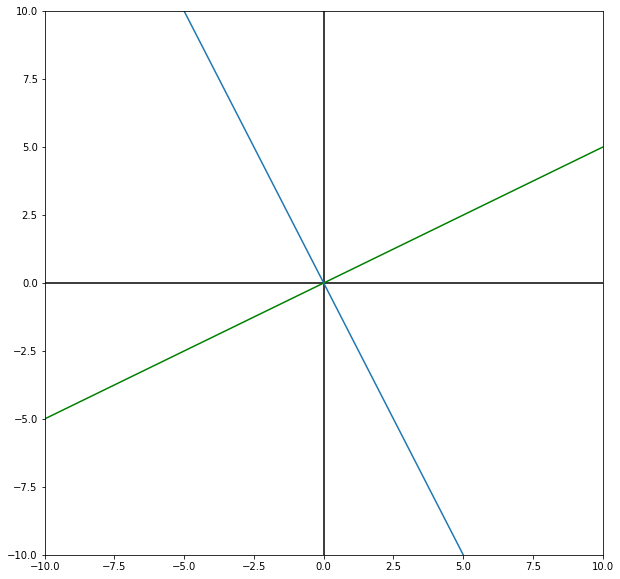

In [6]:
tl = Line(1, -2, 0)
tl2 = tl.get_perpendicular(origin)

base = default_axes()
tl.plot(ax=base, color='g')
tl2.plot(ax=base)

In [7]:
b = Circle([0,0], 1)
# l = Line(-1, 2, 0)
l = points2l([0, 5], [-2, 3])
l2 = Line(1, 1, -5)

[0, 0] [0.1, -0.1] [0.2, -0.2]


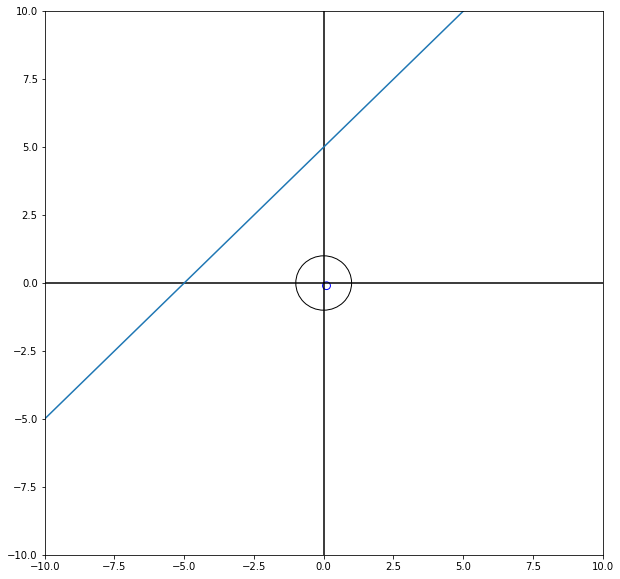

In [8]:
ax = default_axes()
b.plot(ax)
l.plot(ax)
nc = b.invert(l)
nc.plot(ax, color='b')